<a href="https://colab.research.google.com/github/Kirknasty54/Jackson_Kirkpatrick_ICP8/blob/main/Jackson_Kirkpatrick_ICP_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Simple CNN model for CIFAR-10
import numpy
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

Epoch 1/5
235/235 [==============================] - 6s 21ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 2/5
235/235 [==============================] - 5s 19ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 3/5
235/235 [==============================] - 4s 18ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 4/5
235/235 [==============================] - 3s 11ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


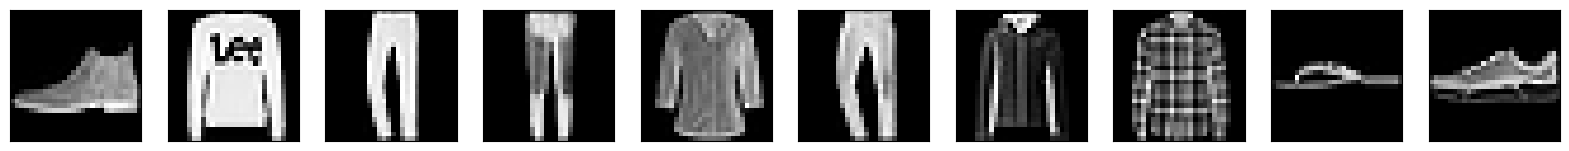

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 2/10
235/235 [==============================] - 3s 15ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 4/10
235/235 [==============================] - 2s 11ms/step - loss: 0.6922 - val_loss: 0.6922
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6921 - val_loss: 0.6921
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6920 - val_loss: 0.6920
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6919 - val_loss: 0.6919
Epoch 8/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6918 - val_loss: 0.6917
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6917 - val_loss: 0.6916
Epoch 10/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6916 - val_lo

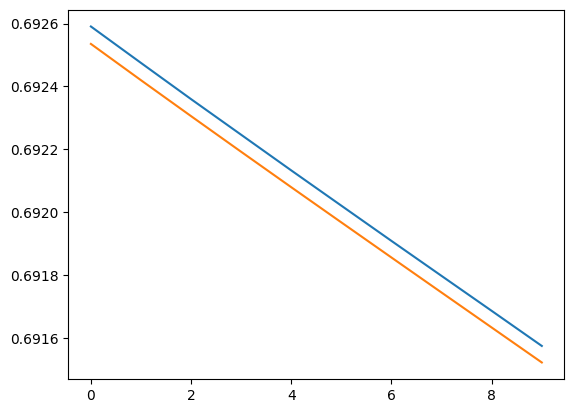

In [23]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
hidden = Dense(64, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)
plt.figure(figsize=(20,4))
for i in range(10):
  ax = plt.subplot(2, 10, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
print(decoded_imgs)

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6987 - val_loss: 0.6985
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6984 - val_loss: 0.6982
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6981 - val_loss: 0.6979
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6978 - val_loss: 0.6976
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6975 - val_loss: 0.6974
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6972 - val_loss: 0.6971
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6970 - val_loss: 0.6968
Epoch 8/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6967 - val_loss: 0.6966
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6965 - val_loss: 0.6964
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


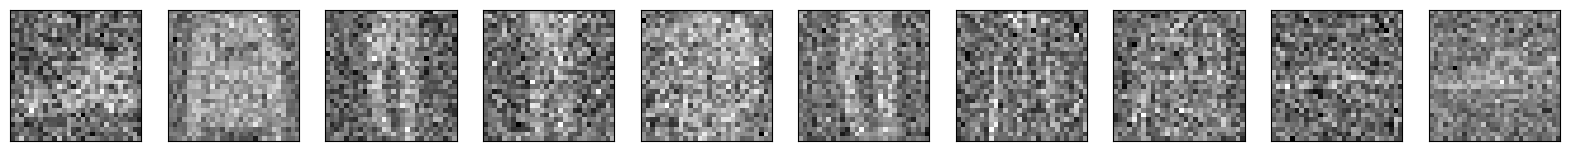

Epoch 1/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6960 - val_loss: 0.6959
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6958 - val_loss: 0.6957
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.6956 - val_loss: 0.6955
Epoch 4/10
235/235 [==============================] - 2s 11ms/step - loss: 0.6953 - val_loss: 0.6953
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6951 - val_loss: 0.6951
Epoch 6/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6949 - val_loss: 0.6949
Epoch 7/10
235/235 [==============================] - 2s 11ms/step - loss: 0.6947 - val_loss: 0.6947
Epoch 8/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 10/10
235/235 [==============================] - 3s 15ms/step - loss: 0.6942 - val_lo

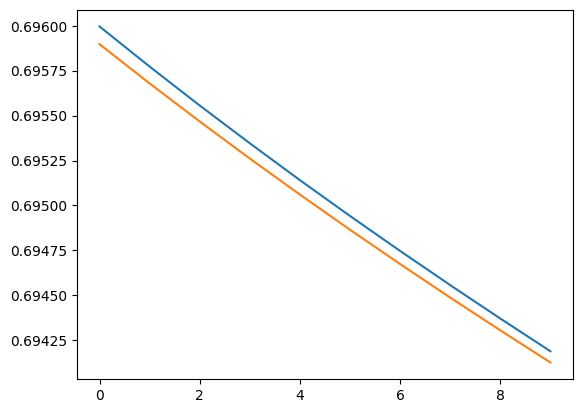

In [20]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

decoded_imgs = autoencoder.predict(x_test_noisy)
plt.figure(figsize=(20,4))
for i in range(10):
  ax = plt.subplot(2, 10, i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')